In [16]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdf
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [17]:
## 주식 데이터 불러오기
df = fdr.DataReader('AAPL', '2020-01-02', '2023-09-08')
print(df)

adj_close_df = df[['Adj Close','Volume']]
print(adj_close_df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   73.249023   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.536888   
2020-01-06   73.447502   74.989998   73.187500   74.949997   73.114883   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.771011   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.941635   
...                ...         ...         ...         ...         ...   
2023-08-31  187.839996  189.119995  187.479996  187.869995  187.869995   
2023-09-01  189.490005  189.919998  188.279999  189.460007  189.460007   
2023-09-05  188.279999  189.979996  187.610001  189.699997  189.699997   
2023-09-06  188.399994  188.850006  181.470001  182.910004  182.910004   
2023-09-07  175.179993  178.210007  173.539993  177.559998  177.559998   

               Volume  
Date         

,USD_KRX_close
Date,
2020-01-02,1153.969971
2020-01-03,1157.150024
2020-01-06,1165.849976
2020-01-07,1167.420044
2020-01-08,1166.459961
...,...
2023-09-04,1317.459961
2023-09-05,1317.949951
2023-09-06,1331.729980


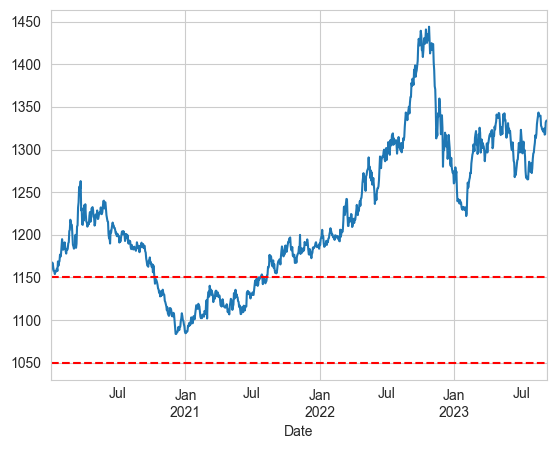

In [18]:
start = '2020-01-02'
end = '2023-09-08'

## 미국 원달러 환율
USD_KRX = fdr.DataReader('USD/KRW', start, end) # 미국 달러/ 한국 원(원달러)
graph = USD_KRX.loc [:,'Close'].plot()
graph.axhline(1050, ls='--', color='r') #1050선
graph.axhline(1150, ls='--', color='r') # 1150선

USD_KRX = USD_KRX[['Close']].rename(columns={"Close": "USD_KRX_close"})
USD_KRX


In [19]:
from fredapi import Fred
fred = Fred(api_key = '4c55d0ee6170369793707da4cba1b7be')


            5-year  10-year  20-year
Date                                
2020-01-02    1.67     1.88     2.19
2020-01-03    1.59     1.80     2.11
2020-01-06    1.61     1.81     2.13
2020-01-07    1.62     1.83     2.16
2020-01-08    1.67     1.87     2.21
...            ...      ...      ...
2023-09-04     NaN      NaN      NaN
2023-09-05    4.37     4.27     4.56
2023-09-06    4.44     4.30     4.56
2023-09-07    4.38     4.27     4.55
2023-09-08    4.39     4.26     4.52

[962 rows x 3 columns]


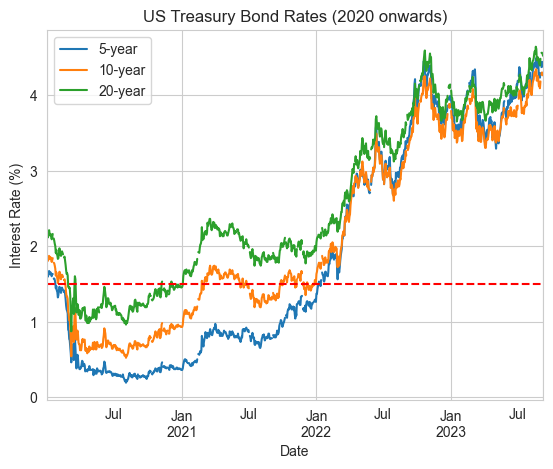

In [23]:
## 미국 국채 금리 (20년, 10년, 5년, 1년)
dgs5 = fred.get_series('DGS5', observation_start=start, observation_end=end)
dgs10 = fred.get_series('DGS10', observation_start=start, observation_end=end)
dgs20 = fred.get_series('DGS20', observation_start=start, observation_end=end)

DGS = pd.concat([dgs5, dgs10, dgs20], axis=1)
DGS.columns = ['5-year', '10-year', '20-year']
DGS.index.name = 'Date'
print(DGS)
graph = DGS.plot(title="US Treasury Bond Rates (2020 onwards)")
graph.set_ylabel("Interest Rate (%)")
graph.axhline(1.5, ls='--', color='r')


            T10Y2Y
Date              
2020-01-02    0.30
2020-01-03    0.27
2020-01-06    0.27
2020-01-07    0.29
2020-01-08    0.29
...            ...
2023-09-04   -0.69
2023-09-05   -0.67
2023-09-06   -0.71
2023-09-07   -0.67
2023-09-08   -0.72

[962 rows x 1 columns]


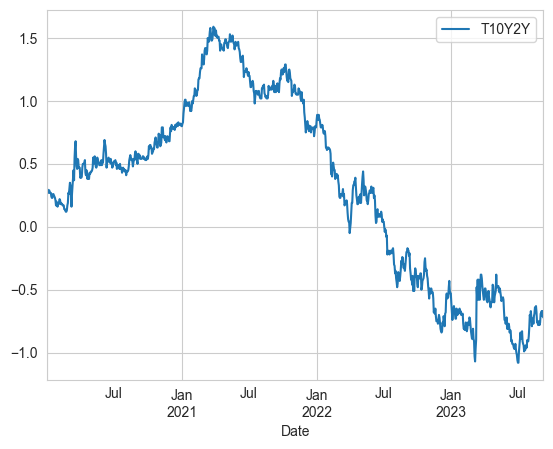

In [24]:
# 미국 장단기 금리차 | 금리차가 0에 가까워지거나 음수가 되면 (인버전), 이는 종종 경제의 둔화 또는 경기침체를 앞두고 있다는 시장의 예상을 반영하는 것
T10Y2Y = fdr.DataReader('FRED:T10Y2Y', start, end)
T10Y2Y.index.name = 'Date'
print(T10Y2Y)
graph=T10Y2Y.plot()

            VIXCLS
Date              
2020-01-02   12.47
2020-01-03   14.02
2020-01-06   13.85
2020-01-07   13.79
2020-01-08   13.45
...            ...
2023-09-04   13.82
2023-09-05   14.01
2023-09-06   14.45
2023-09-07   14.40
2023-09-08   13.84

[962 rows x 1 columns]


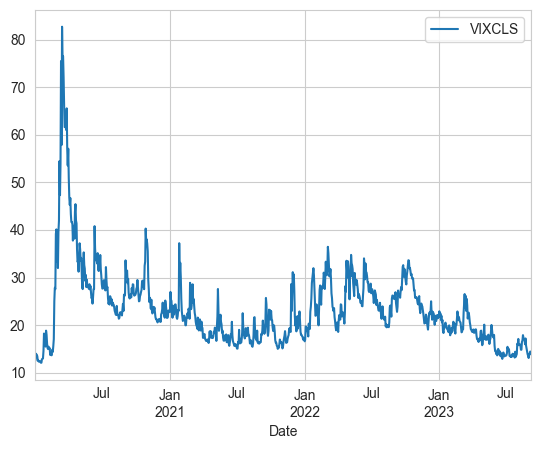

In [25]:
## VIX(변동 지수 %) 시장 불안정성: VIX 지수가 20을 초과하면 일반적으로 시장의 불안정성이 높다고 간주된다. | S&P 500 지수의 연간 변동성을 나타낸다 
VIX = fdr.DataReader('FRED:VIXCLS', start, end)
VIX.index.name = 'Date'
print(VIX)
graph = VIX.plot()

            FEDFUNDS
Date                
2020-01-01      1.55
2020-02-01      1.58
2020-03-01      0.65
2020-04-01      0.05
2020-05-01      0.05
2020-06-01      0.08
2020-07-01      0.09
2020-08-01      0.10
2020-09-01      0.09
2020-10-01      0.09
2020-11-01      0.09
2020-12-01      0.09
2021-01-01      0.09
2021-02-01      0.08
2021-03-01      0.07
2021-04-01      0.07
2021-05-01      0.06
2021-06-01      0.08
2021-07-01      0.10
2021-08-01      0.09
2021-09-01      0.08
2021-10-01      0.08
2021-11-01      0.08
2021-12-01      0.08
2022-01-01      0.08
2022-02-01      0.08
2022-03-01      0.20
2022-04-01      0.33
2022-05-01      0.77
2022-06-01      1.21
2022-07-01      1.68
2022-08-01      2.33
2022-09-01      2.56
2022-10-01      3.08
2022-11-01      3.78
2022-12-01      4.10
2023-01-01      4.33
2023-02-01      4.57
2023-03-01      4.65
2023-04-01      4.83
2023-05-01      5.06
2023-06-01      5.08
2023-07-01      5.12
2023-08-01      5.33


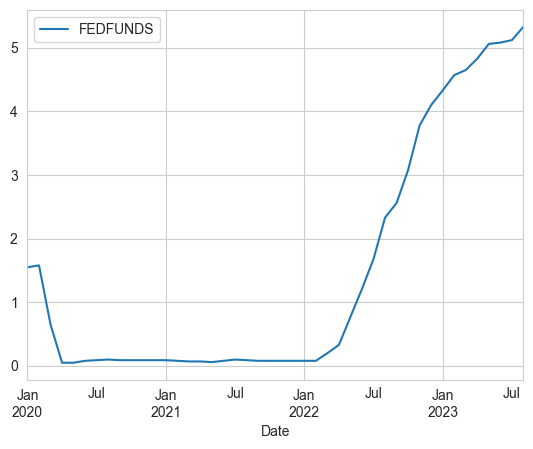

In [27]:
# 중앙은행의 기준금리 지표

FEDFUNDS = fdr.DataReader('FRED:FEDFUNDS', start, end= '2023-09-02')
FEDFUNDS.index.name = 'Date'

print(FEDFUNDS)
graph = FEDFUNDS.plot()

            STLFSI3
Date               
2020-01-03  -0.1834
2020-01-10  -0.2641
2020-01-17  -0.4288
2020-01-24  -0.2341
2020-01-31   0.1302
...             ...
2022-09-30  -1.1795
2022-10-07  -1.1460
2022-10-14  -1.3854
2022-10-21  -1.8553
2022-10-28  -1.7057

[148 rows x 1 columns]


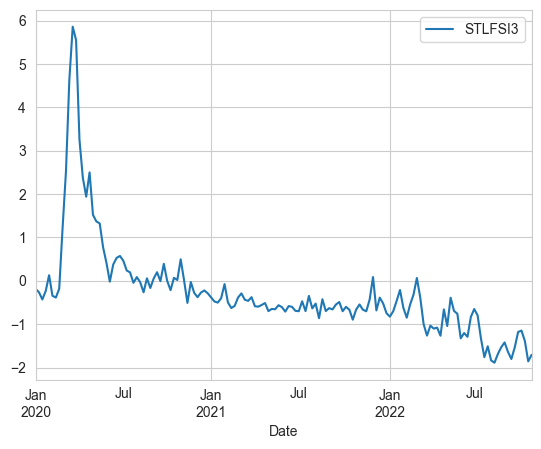

In [28]:
## 금융 스트레스 지수 (FSI) - 0을 기준으로 0보다 크면 금융 스트레스 수준이 평균보다 높고 작으면 평균보다 작다는것
STLFSI3 = fdr.DataReader('FRED:STLFSI3', start, end)
STLFSI3.index.name = 'Date'

print(STLFSI3)
graph = STLFSI3.plot()

            CPIAUCSL
Date                
2020-01-01   259.037
2020-02-01   259.248
2020-03-01   258.124
2020-04-01   256.092
2020-05-01   255.868
2020-06-01   256.986
2020-07-01   258.278
2020-08-01   259.411
2020-09-01   260.029
2020-10-01   260.286
2020-11-01   260.813
2020-12-01   262.035
2021-01-01   262.650
2021-02-01   263.638
2021-03-01   264.914
2021-04-01   266.670
2021-05-01   268.444
2021-06-01   270.559
2021-07-01   271.764
2021-08-01   272.870
2021-09-01   274.028
2021-10-01   276.522
2021-11-01   278.711
2021-12-01   280.887
2022-01-01   282.599
2022-02-01   284.610
2022-03-01   287.472
2022-04-01   288.611
2022-05-01   291.268
2022-06-01   294.728
2022-07-01   294.628
2022-08-01   295.320
2022-09-01   296.539
2022-10-01   297.987
2022-11-01   298.598
2022-12-01   298.990
2023-01-01   300.536
2023-02-01   301.648
2023-03-01   301.808
2023-04-01   302.918
2023-05-01   303.294
2023-06-01   303.841
2023-07-01   304.348
2023-08-01   306.269


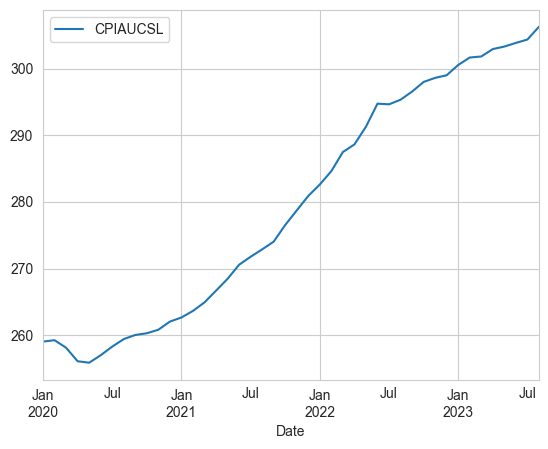

In [29]:
## 소비자 가격 지수 → 인플레이션(CPI) Index 값 기준: 1982-1984로, 이 기간의 평균 CPI를 100으로 설정합니다
CPI = fdr.DataReader('FRED:CPIAUCSL', start, end)
CPI.index.name = 'Date'
print(CPI)
graph = CPI.plot()


            UNRATE
Date              
2020-01-01     3.5
2020-02-01     3.5
2020-03-01     4.4
2020-04-01    14.7
2020-05-01    13.2
2020-06-01    11.0
2020-07-01    10.2
2020-08-01     8.4
2020-09-01     7.9
2020-10-01     6.9
2020-11-01     6.7
2020-12-01     6.7
2021-01-01     6.3
2021-02-01     6.2
2021-03-01     6.1
2021-04-01     6.1
2021-05-01     5.8
2021-06-01     5.9
2021-07-01     5.4
2021-08-01     5.2
2021-09-01     4.8
2021-10-01     4.5
2021-11-01     4.2
2021-12-01     3.9
2022-01-01     4.0
2022-02-01     3.8
2022-03-01     3.6
2022-04-01     3.6
2022-05-01     3.6
2022-06-01     3.6
2022-07-01     3.5
2022-08-01     3.7
2022-09-01     3.5
2022-10-01     3.7
2022-11-01     3.6
2022-12-01     3.5
2023-01-01     3.4
2023-02-01     3.6
2023-03-01     3.5
2023-04-01     3.4
2023-05-01     3.7
2023-06-01     3.6
2023-07-01     3.5
2023-08-01     3.8


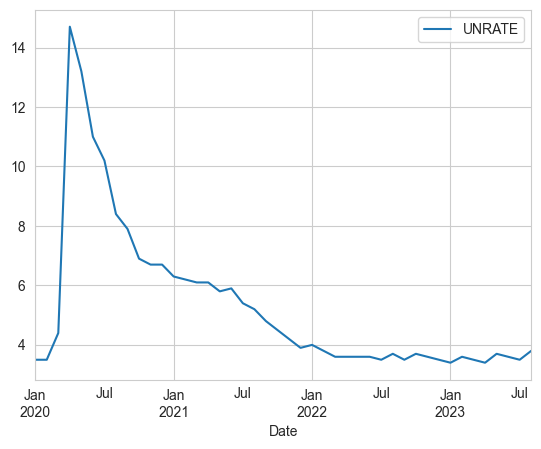

In [30]:
## Unemployment_Rate (실업률)

Unemployment_Rate = fdr.DataReader('FRED:UNRATE', start, end)
Unemployment_Rate.index.name = 'Date'
print(Unemployment_Rate)
graph = Unemployment_Rate.plot()

In [33]:
## GDP 데이터 불러오기 분기별로밖에 지원안됌

GDP = pd.DataFrame(fred.get_series('GDP',observation_start=start, observation_end = end),columns=['GDP'])
GDP.index.name = 'Date'
print(GDP)

                  GDP
Date                 
2020-01-01  21538.032
2020-04-01  19636.731
2020-07-01  21362.428
2020-10-01  21704.706
2021-01-01  22313.850
2021-04-01  23046.934
2021-07-01  23550.420
2021-10-01  24349.121
2022-01-01  24740.480
2022-04-01  25248.476
2022-07-01  25723.941
2022-10-01  26137.992
2023-01-01  26529.774
2023-04-01  26798.605


In [34]:
df.index.name = 'Date'
USD_KRX.index.name = 'Date'
DGS.index.name = 'Date'
T10Y2Y.index.name = 'Date'
VIX.index.name = 'Date'
STLFSI3.index.name = 'Date'
CPI.index.name = 'Date'
Unemployment_Rate.index.name = 'Date'
GDP.index.name = 'Date'


In [35]:
# 'Date' 인덱스를 datetime 형식으로 변환
adj_close_df.index = pd.to_datetime(adj_close_df.index)
USD_KRX.index = pd.to_datetime(USD_KRX.index)
DGS.index = pd.to_datetime(DGS.index)
T10Y2Y.index = pd.to_datetime(T10Y2Y.index)
VIX.index = pd.to_datetime(VIX.index)
STLFSI3.index = pd.to_datetime(STLFSI3.index)
CPI.index = pd.to_datetime(CPI.index)
Unemployment_Rate.index = pd.to_datetime(Unemployment_Rate.index)
GDP.index = pd.to_datetime(GDP.index)


In [36]:

# 모든 결합된 데이터를 합침
econ_df = adj_close_df.join([USD_KRX, DGS, T10Y2Y, VIX], how='left')
print(econ_df)


             Adj Close       Volume  USD_KRX_close  5-year  10-year  20-year  \
Date                                                                           
2020-01-02   73.249023  135480400.0    1153.969971    1.67     1.88     2.19   
2020-01-03   72.536888  146322800.0    1157.150024    1.59     1.80     2.11   
2020-01-06   73.114883  118387200.0    1165.849976    1.61     1.81     2.13   
2020-01-07   72.771011  108872000.0    1167.420044    1.62     1.83     2.16   
2020-01-08   73.941635  132079200.0    1166.459961    1.67     1.87     2.21   
...                ...          ...            ...     ...      ...      ...   
2023-08-31  187.869995   60794500.0    1323.030029    4.23     4.09     4.39   
2023-09-01  189.460007   45732600.0    1324.640015    4.29     4.18     4.48   
2023-09-05  189.699997   45280000.0    1317.949951    4.37     4.27     4.56   
2023-09-06  182.910004   81755800.0    1331.729980    4.44     4.30     4.56   
2023-09-07  177.559998  112488800.0    1

In [37]:
econ_df.to_csv('econ_df.csv')